导入程序需要的库

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

设置matplotlib绘图参数

In [2]:
plt.rcParams['figure.figsize'] = (5, 6)
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

实验一 导入红酒数据集，设置X，Y，使用DataFrame显示数据维度。

In [3]:
wine = datasets.load_wine()
X = wine["data"]
Y = wine["target"]
label = wine["feature_names"]
df = pd.DataFrame(data=X, columns=label)
label.append("label")
df["label"] = Y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


绘制相关性矩阵

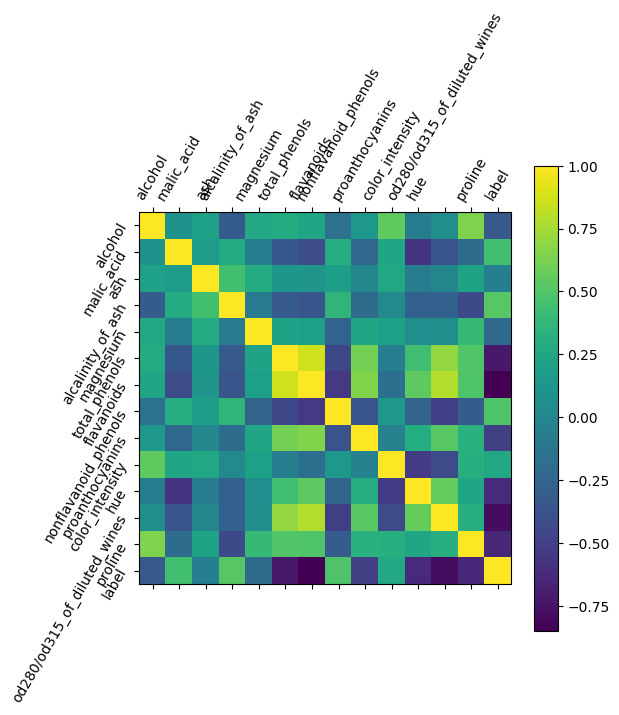

In [4]:
plt.matshow(df.corr())
plt.xticks(range(len(label)),label,rotation=60)
plt.yticks(range(len(label)),label,rotation=60)
plt.colorbar()
plt.show()

建立神经网络模型，使用题目预设参数，预测结果，准确率较低。

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
clf = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=42)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.3333333333333333

绘制混淆矩阵，可以看到结果全部归类为class_1，属于欠拟合

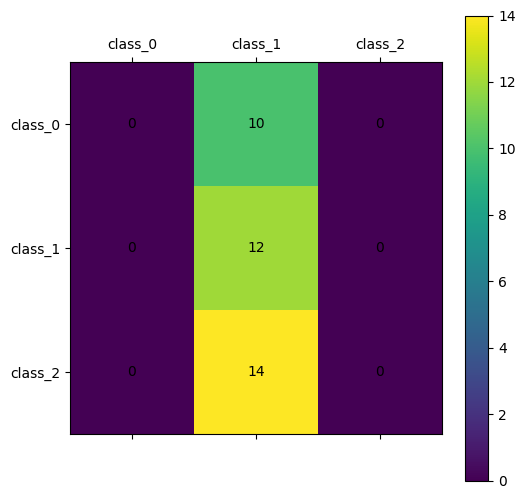

In [6]:
y_pred = clf.predict(x_test)
y_real = y_test
cf_mx = confusion_matrix(y_real,y_pred)

plt.matshow(cf_mx)

for x in range(len(cf_mx)):
    for y in range(len(cf_mx)):
        info = cf_mx[y,x]
        plt.text(x,y,info,verticalalignment='center',horizontalalignment='center')


plt.xticks(range(len(wine["target_names"])),wine["target_names"])
plt.yticks(range(len(wine["target_names"])),wine["target_names"])
plt.colorbar()
plt.show()

实验二 导入红酒数据集，设置X，Y，使用DataFrame显示数据维度。

In [7]:
iris = datasets.load_iris()
X = iris["data"]
Y = iris["target"]
label = iris["feature_names"]
df = pd.DataFrame(data=X, columns=label)
label.append("label")
df["label"] = Y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


绘制相关性矩阵

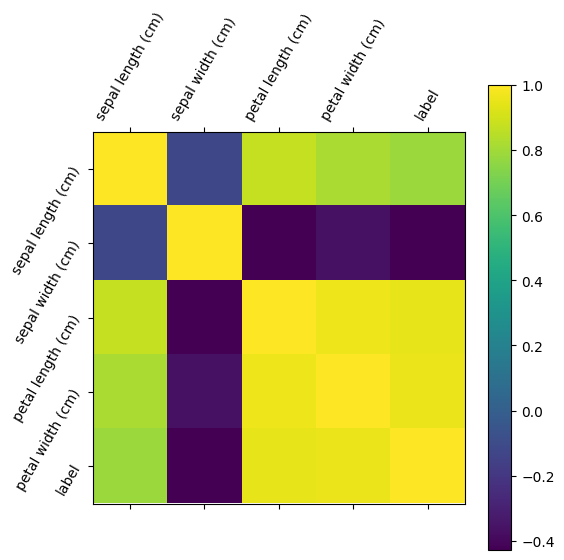

In [8]:
plt.matshow(df.corr())
plt.xticks(range(len(label)),label,rotation=60)
plt.yticks(range(len(label)),label,rotation=60)
plt.colorbar()
plt.show()

建立神经网络模型，使用题目预设参数，预测结果，准确率还行。

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
clf = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=42)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9333333333333333

绘制混淆矩阵，只有一个数据分类错误。

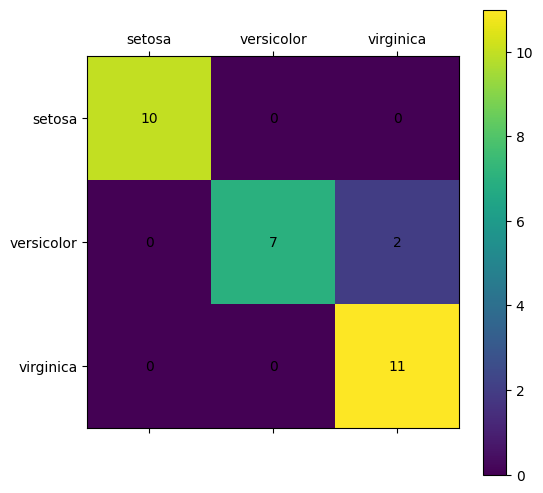

In [10]:
y_pred = clf.predict(x_test)
y_real = y_test
cf_mx = confusion_matrix(y_real,y_pred)
plt.rcParams['figure.figsize'] = (5, 6)
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

plt.matshow(cf_mx)

for x in range(len(cf_mx)):
    for y in range(len(cf_mx)):
        info = cf_mx[y,x]
        plt.text(x,y,info,verticalalignment='center',horizontalalignment='center')


plt.xticks(range(len(iris["target_names"])),iris["target_names"])
plt.yticks(range(len(iris["target_names"])),iris["target_names"])
plt.colorbar()
plt.show()

实验三 模型调优

In [11]:
iris = datasets.load_iris()
X = iris["data"]
Y = iris["target"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.5,shuffle=True,random_state=42)

调整隐藏层，改为3层8个神经元，准确率明显上升。

In [12]:
clf = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(8,3),random_state=42)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.96

调整激活函数，改为tanh时，准确率再次上升。

In [13]:
clf = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(8,3),random_state=42,activation='tanh')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

E:\ProgramData\Anaconda\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9733333333333334

将学习率降低一个量级，准确率再次上升。

In [14]:
clf = MLPClassifier(solver='lbfgs',alpha=1e-6,hidden_layer_sizes=(8,3),random_state=42,activation='tanh')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9866666666666667

调整权重方法，此时已经基本达到模型拟合极限。

In [15]:
clf = MLPClassifier(solver='adam',alpha=1e-6,hidden_layer_sizes=(8,3),random_state=42,activation='tanh')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

E:\ProgramData\Anaconda\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9866666666666667

此时，分类基本准确。

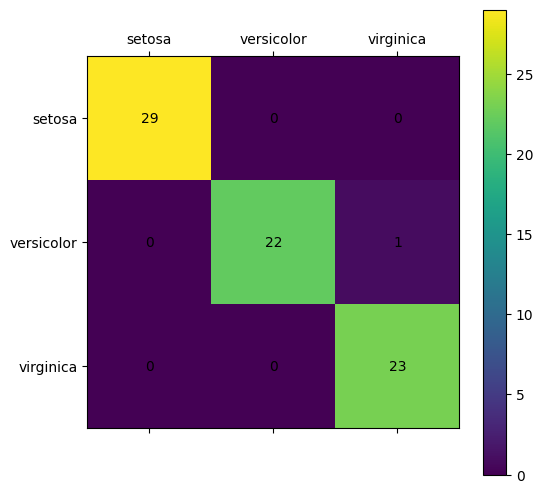

In [16]:
y_pred = clf.predict(x_test)
y_real = y_test
cf_mx = confusion_matrix(y_real,y_pred)
plt.rcParams['figure.figsize'] = (5, 6)
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

plt.matshow(cf_mx)

for x in range(len(cf_mx)):
    for y in range(len(cf_mx)):
        info = cf_mx[y,x]
        plt.text(x,y,info,verticalalignment='center',horizontalalignment='center')


plt.xticks(range(len(iris["target_names"])),iris["target_names"])
plt.yticks(range(len(iris["target_names"])),iris["target_names"])
plt.colorbar()
plt.show()